In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot  as plt

In [2]:
! pip install yfinance

In [3]:
import yfinance as yf

In [4]:
data = yf.download("MSFT", start_date = "2002-01-01" , end_date = "2020-01-01")

[*********************100%***********************]  1 of 1 completed


In [5]:
data.shape

(8697, 6)

In [6]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1986-03-13,0.088542,0.101562,0.088542,0.097222,0.062055,1031788800
1986-03-14,0.097222,0.102431,0.097222,0.100694,0.064271,308160000
1986-03-17,0.100694,0.103299,0.100694,0.102431,0.065379,133171200
1986-03-18,0.102431,0.103299,0.098958,0.099826,0.063717,67766400
1986-03-19,0.099826,0.100694,0.097222,0.098090,0.062609,47894400
...,...,...,...,...,...,...
2020-09-04,215.100006,218.360001,205.190002,214.250000,214.250000,59664100
2020-09-08,206.500000,210.029999,202.199997,202.660004,202.660004,52924300
2020-09-09,207.600006,214.839996,206.699997,211.289993,211.289993,45679000


In [7]:
data.isnull().values.any()

False

Creating the feature vectors for the given stock data.

In [8]:
# Moving Average \
pat = 21
Y = data["Open"]
mv = []
for k in range(pat,len(data["Open"])):
    mv.append(sum(Y[k-pat:k])/pat)

In [9]:
mv2 = []
for k in range(1,len(mv)):
    mv2.append((Y[k+pat-1] - mv[k-1])*(2/(pat+1)) + mv[k-1])

In [10]:
desp = []
for k in range(pat,len(data["Open"])):
    desp.append(Y[k]/mv[k-pat])


In [11]:
moment = []
moment2 = []
roc = []
for k in range(pat,len(Y)):
    moment.append(Y[k]/Y[k-5])
    moment2.append(Y[k] - Y[k-5])
    roc.append(Y[k]/moment2[-1])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in double_scalars
  import sys


In [12]:
df_np = np.array(data)

In [13]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1986-03-13,0.088542,0.101562,0.088542,0.097222,0.062055,1031788800
1986-03-14,0.097222,0.102431,0.097222,0.100694,0.064271,308160000
1986-03-17,0.100694,0.103299,0.100694,0.102431,0.065379,133171200
1986-03-18,0.102431,0.103299,0.098958,0.099826,0.063717,67766400
1986-03-19,0.099826,0.100694,0.097222,0.098090,0.062609,47894400
...,...,...,...,...,...,...
2020-09-04,215.100006,218.360001,205.190002,214.250000,214.250000,59664100
2020-09-08,206.500000,210.029999,202.199997,202.660004,202.660004,52924300
2020-09-09,207.600006,214.839996,206.699997,211.289993,211.289993,45679000


In [14]:
df = pd.DataFrame()
df["Open"] = df_np[22:,0]
df["Close"] = df_np[22:,3]
df["Vol"] = df_np[22:,5]
df["High"] = df_np[22:,1]

In [15]:
df["Moving average"] = mv[1:]
df["Moving Average 2"] = mv2
df["Momentum"] = moment[1:]
df["Momentum 2"] = moment2 [1:]
df["Roc"] = roc[1:]
df["Desparity"] = desp[1:]

In [16]:
df

,Open,Close,Vol,High,Moving average,Moving Average 2,Momentum,Momentum 2,Roc,Desparity
0,0.100694,0.100694,9302400.0,0.100694,0.096437,0.096256,1.064220,0.006076,16.571411,1.044149
1,0.100694,0.104167,31910400.0,0.105035,0.096602,0.096824,1.054545,0.005208,19.333325,1.042362
2,0.104167,0.105035,22003200.0,0.105035,0.096602,0.096974,1.071429,0.006944,15.000009,1.078306
3,0.105035,0.101562,21628800.0,0.105035,0.096685,0.097290,1.061403,0.006076,17.285717,1.086362
4,0.101562,0.101562,22924800.0,0.102431,0.096933,0.097444,1.017391,0.001736,58.499972,1.047761
...,...,...,...,...,...,...,...,...,...,...
8670,215.100006,214.250000,59664100.0,218.360001,215.767619,216.373030,0.942677,-13.079987,-16.444971,0.996906
8671,206.500000,202.660004,52924300.0,210.029999,215.899048,215.706927,0.909692,-20.500000,-10.073171,0.956466
8672,207.600006,211.289993,45679000.0,214.839996,215.501429,215.044589,0.920580,-17.909988,-11.591298,0.963335
8673,213.399994,205.369995,35461500.0,214.740005,215.307619,214.783117,0.936088,-14.570007,-14.646526,0.991140


In [17]:
#Now target vectors
tar_vec = []
for k in range(21,len(data["Open"])-1):
    tar_vec.append(df_np[k+1,0]-df_np[k,3])

In [18]:
tv = [ 0 if x < 0 else 1 for x in tar_vec]

In [19]:
df.drop("Roc", inplace = True, axis= 1)

In [20]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
feature_minmax_transform_data = scaler.fit_transform(df[df.columns])
feature_minmax_transform = pd.DataFrame(columns=df.columns, data=feature_minmax_transform_data, index=df.index)
feature_minmax_transform.head()

,Open,Close,Vol,High,Moving average,Moving Average 2,Momentum,Momentum 2,Desparity
0,0.000027,0.000030,0.008899,0.000022,0.000000e+00,0.000000,0.686725,0.655294,0.581593
1,0.000027,0.000045,0.037649,0.000041,7.661816e-07,0.000003,0.671185,0.655276,0.579129
2,0.000042,0.000049,0.025050,0.000041,7.661816e-07,0.000003,0.698303,0.655313,0.628674
3,0.000045,0.000034,0.024574,0.000041,1.149272e-06,0.000005,0.682201,0.655294,0.639779
4,0.000030,0.000034,0.026222,0.000030,2.298545e-06,0.000005,0.611508,0.655202,0.586572


In [21]:
from sklearn.model_selection import TimeSeriesSplit
ts_split= TimeSeriesSplit(n_splits=10)
for train_index, test_index in ts_split.split(feature_minmax_transform):
        X_train, X_test = feature_minmax_transform[:len(train_index)], feature_minmax_transform[len(train_index): (len(train_index)+len(test_index))]
        y_train, y_test = tv[:len(train_index)], tv[len(train_index): (len(train_index)+len(test_index))]


In [22]:
from sklearn.metrics import mean_squared_error, r2_score
def validate_result(model, model_name):
    predicted = model.predict(X_test)
    RSME_score = np.sqrt(mean_squared_error(validation_y, y_test))
    print('RMSE: ', RSME_score)
    
    R2_score = r2_score(validation_y, predicted)
    print('R2 score: ', R2_score)

    plt.plot(validation_y.index, predicted,'r', label='Predict')
    plt.plot(validation_y.index, validation_y,'b', label='Actual')
    plt.ylabel('Price')
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
    plt.title(model_name + ' Predict vs Actual')    
    plt.legend(loc='upper right')
    plt.show()

In [23]:
from tensorflow.keras.layers import LSTM,Dense,Dropout
from tensorflow.keras.models import Sequential

Lets take history onto account just try to fit LSTM to fit to the time series data.

In [24]:
from tensorflow.keras.callbacks import ModelCheckpoint

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Embedding,LSTM,Bidirectional
from tensorflow.keras.optimizers import Adam

In [34]:
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
dt = DecisionTreeClassifier()

dt.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [35]:
print(dt.score(X_train,y_train),dt.score(X_test,y_test))

1.0 0.549492385786802


In [28]:
X_train =np.array(X_train)
X_test =np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)
X_tr_t = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_tst_t = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

In [29]:
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow.keras.backend as Ker
Ker.clear_session()
model_lstm = Sequential()
model_lstm.add(LSTM(21, input_shape=(1, X_train.shape[1]), activation='relu', return_sequences=False))
model_lstm.add(Dense(10, activation = "relu"))
model_lstm.add(Dense(1,activation = "sigmoid"))
early_stop = EarlyStopping(monitor='loss', patience=5, verbose=1)
checkpoint = ModelCheckpoint('model.h5', verbose=1, monitor='val_accuracy',save_best_only=True, mode='auto')
model_lstm.compile(loss = 'binary_crossentropy', optimizer='adam',metrics=["accuracy"])
history_model_lstm = model_lstm.fit(X_tr_t, y_train, epochs=10, batch_size=8, verbose=1, shuffle=True, validation_data=(X_tst_t,y_test),callbacks=[early_stop,checkpoint])

Epoch 1/10
964/986 [============================>.] - ETA: 0s - loss: 0.6721 - accuracy: 0.5826
Epoch 00001: val_accuracy improved from -inf to 0.42766, saving model to model.h5
986/986 [==============================] - 3s 3ms/step - loss: 0.6721 - accuracy: 0.5827 - val_loss: 0.6963 - val_accuracy: 0.4277
Epoch 2/10
985/986 [============================>.] - ETA: 0s - loss: 0.6632 - accuracy: 0.5805
Epoch 00002: val_accuracy did not improve from 0.42766
986/986 [==============================] - 3s 3ms/step - loss: 0.6632 - accuracy: 0.5804 - val_loss: 0.7014 - val_accuracy: 0.4124
Epoch 3/10
969/986 [============================>.] - ETA: 0s - loss: 0.6618 - accuracy: 0.5846
Epoch 00003: val_accuracy did not improve from 0.42766
986/986 [==============================] - 3s 3ms/step - loss: 0.6624 - accuracy: 0.5837 - val_loss: 0.6957 - val_accuracy: 0.4124
Epoch 4/10
984/986 [============================>.] - ETA: 0s - loss: 0.6616 - accuracy: 0.5810
Epoch 00004: val_accuracy did n

In [30]:
y_pr = [1 if x > 0.5 else 1 for x in model_lstm.predict(X_tst_t)]

In [31]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pr)

0.5875634517766497

# Absurd Models

The reson for their being so much randomness in the models is due to the target variable. As i think the data of the Closing today and opening the next day is almost similar hance the diffrence is sort of random noise.

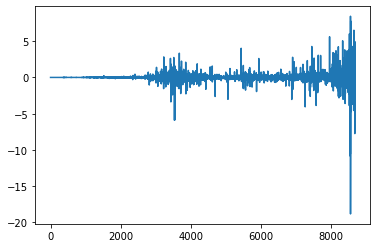

In [36]:
#plotting the terget variable
plt.plot(tar_vec)
plt.show()

As can be infered is almost zero for most of the period and hence there is just too much randomness in the data(and hence the models) to predict and thing usefull.